## Convolutions and Blurring

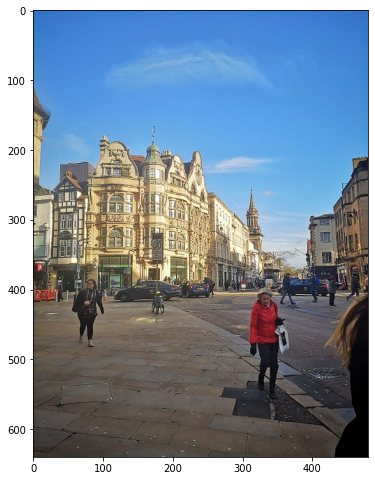

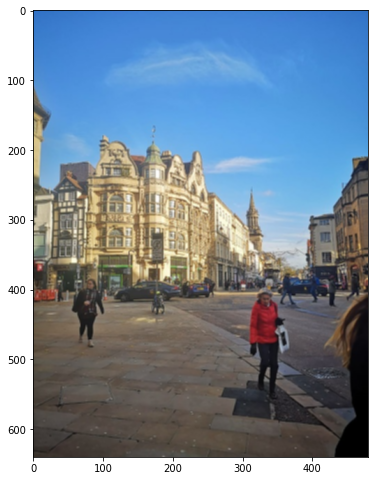

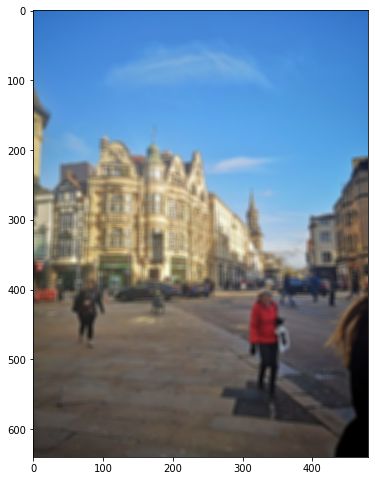

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/oxford.jpg')
plt.figure(figsize=(6, 19))
plt.imshow(image[:, :, ::-1])

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
plt.figure(figsize=(6, 19))
plt.imshow(blurred[:, :, ::-1])

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
plt.figure(figsize=(6, 19))
plt.imshow(blurred2[:, :, ::-1])


### Other commonly used blurring methods in OpenCV
- Gaussian Blurring
- Median Blurring
- Bilateral Blurring

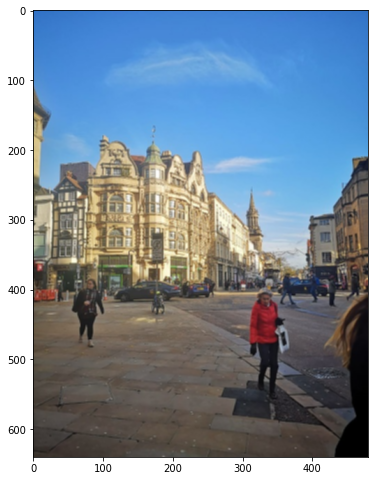

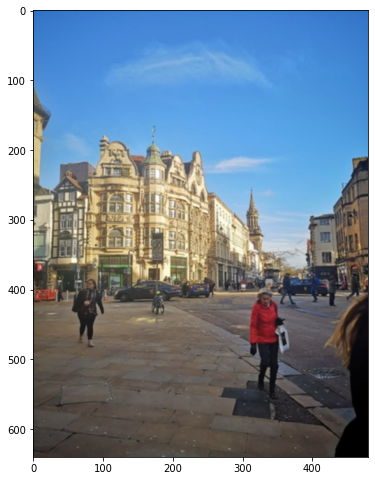

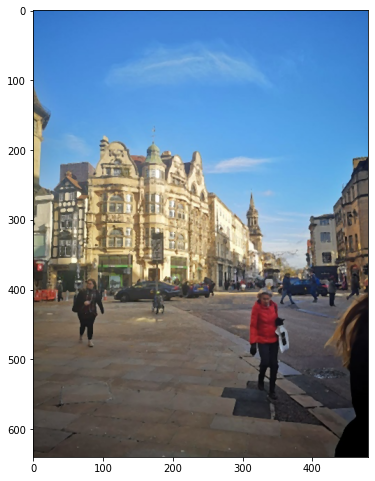

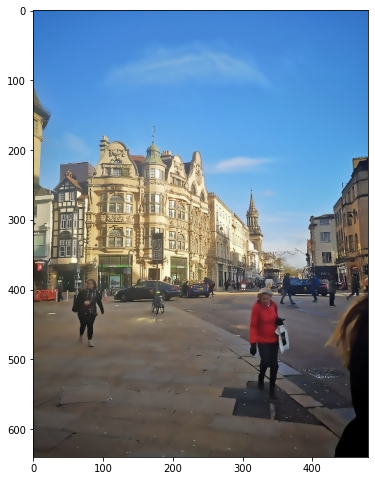

In [2]:
image = cv2.imread('images/oxford.jpg')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (3,3))
plt.figure(figsize=(6, 19))
plt.imshow(blur[:, :, ::-1])

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (3,3), 0)
plt.figure(figsize=(6, 19))
plt.imshow(Gaussian[:, :, ::-1])

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 3)
plt.figure(figsize=(6, 19))
plt.imshow(median[:, :, ::-1])

# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
plt.figure(figsize=(6, 19))
plt.imshow(bilateral[:, :, ::-1])


### Bilateral Filter
#### dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
- **src**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **dst**	Destination image of the same size and type as src .
- **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **borderType**	border mode used to extrapolate pixels outside of the image

## Image De-noising - Non-Local Means Denoising

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

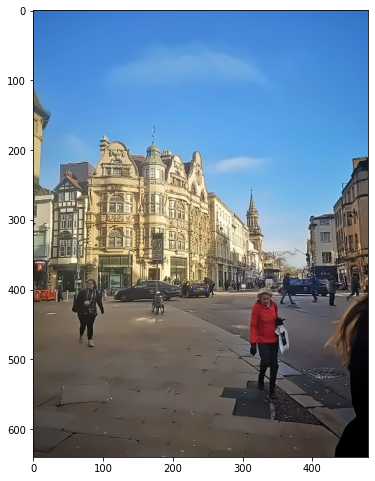

In [3]:
image = cv2.imread('images/oxford.jpg')

# Parameters, after None are - the filter strength 'h' (5-10 is a good range)
# Next is hForColorComponents, set as same value as h again
# 
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)

plt.figure(figsize=(6, 19))
plt.imshow(dst[:, :, ::-1])


#### Parameters for fastNlMeansDenoisingColored:	

fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

# Sharpening

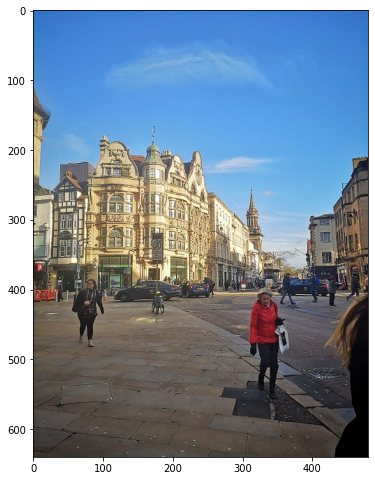

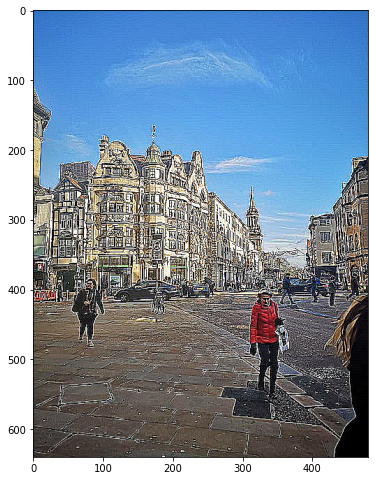

In [4]:
# Loading our image
image = cv2.imread('images/oxford.jpg')

plt.figure(figsize=(6, 19))
plt.imshow(image[:, :, ::-1])

# Create our shapening kernel, remember it must sum to one 
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
plt.figure(figsize=(6, 19))
plt.imshow(sharpened[:, :, ::-1])
